In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/moshida/EUVlitho


In [2]:
from elitho.mask_pattern import LinePattern
from elitho import const
from elitho import fourier

mask = LinePattern(cd=80, gap=60, direction="V", field_type="DF")(const.NDIVX, const.NDIVY)

/home/moshida/.pyenv/versions/3.12.11/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


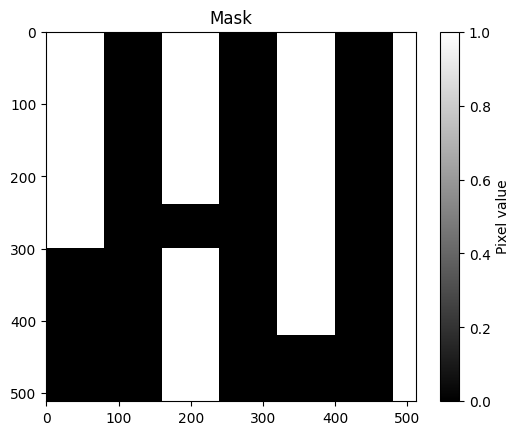

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(mask, cmap='gray', interpolation='nearest')
plt.title("Mask")
plt.colorbar(label="Pixel value")
plt.show()

In [4]:

from elitho.intensity import intensity

intensity_map = intensity(mask)

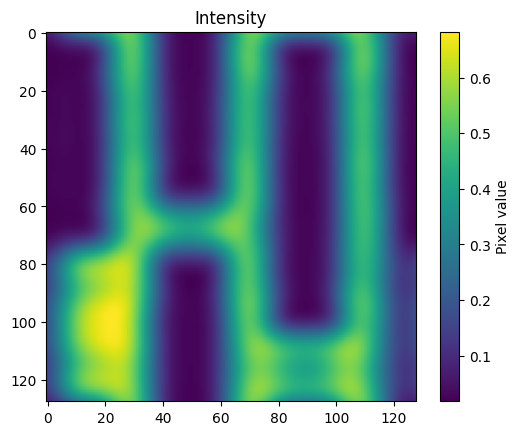

In [5]:
from matplotlib import pyplot as plt
plt.imshow(intensity_map)
plt.title("Intensity")
plt.colorbar(label="Pixel value")
plt.show()